In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [103]:
#Read the income return on the type of degree CSV
Degrees_Payback = pd.read_csv('degrees-that-pay-back.csv')
Degree_df = pd.DataFrame(Degrees_Payback)

#Ready the salary averages based on college type
Salary_By_College = pd.read_csv('salaries-by-college-type.csv')
College_Salary_df = pd.DataFrame(Salary_By_College)

#Read the income based upon region
Salary_By_Region = pd.read_csv('salaries-by-region.csv')
Region_Salary_df = pd.DataFrame(Salary_By_Region)

In [104]:
Region_Salary_df.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [105]:
#Check for duplicate rows and create a column for duplicate Rows in DF (There were non)
Region_Salary_df["Is_Duplicated"]= Region_Salary_df.duplicated()

#Rename the columns
Region_Salary_df.columns = ['School Name', 'Region', 'Starting_Salary', 'Mid_Career_Salary', 'Mid_10th', 'Mid_25th', 'Mid_75th', 'Mid_90th','Is_Duplicated']

#Create list for loop
Salary_Cols = ['Starting_Salary', 'Mid_Career_Salary', 'Mid_10th', 'Mid_25th', 'Mid_75th', 'Mid_90th']

#Loop through DF and convert columns with Dollar $ign (objects) to numeric values (integer)
for x in Salary_Cols:
    Region_Salary_df[x] = Region_Salary_df[x].str.replace("$","")
    Region_Salary_df[x] = Region_Salary_df[x].str.replace(",","")
    Region_Salary_df[x] = pd.to_numeric(Region_Salary_df[x])

Region_Salary_df.head()

#Sort DF by Regions with the Highest to lowest 'Starting_Mid' Salaries
Region_Sort = Region_Salary_df.sort_values(['Region', 'Starting_Salary'], ascending=[True, False])
Region_Sort.head()

,School Name,Region,Starting_Salary,Mid_Career_Salary,Mid_10th,Mid_25th,Mid_75th,Mid_90th,Is_Duplicated
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN,False
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN,False
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0,False
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0,False
5,Cal Poly San Luis Obispo,California,57200.0,101000.0,55000.0,74700.0,133000.0,178000.0,False


In [106]:
Region_Salary_df.describe()

,Starting_Salary,Mid_Career_Salary,Mid_10th,Mid_25th,Mid_75th,Mid_90th
count,320.000000,320.000000,273.000000,320.000000,320.000000,273.000000
mean,46253.437500,83934.375000,45253.113553,60614.062500,116496.875000,160442.124542
std,6617.038001,15191.443091,8562.834333,11786.436432,24104.265214,36785.768186
min,34500.000000,43900.000000,25600.000000,31800.000000,60900.000000,85700.000000
25%,42000.000000,73725.000000,39500.000000,53100.000000,99825.000000,136000.000000
50%,45100.000000,82700.000000,43700.000000,59400.000000,113000.000000,154000.000000
75%,48900.000000,93250.000000,48900.000000,66025.000000,129000.000000,178000.000000
max,75500.000000,134000.000000,80000.000000,104000.000000,234000.000000,326000.000000


In [107]:
#Clean DF to the areas of focus
Region_Clean = Region_Salary_df[["School Name", "Region", "Starting_Salary", "Mid_Career_Salary", "Mid_90th"]]
Region_Clean = Region_Clean.dropna()
Region_Clean.head()

,School Name,Region,Starting_Salary,Mid_Career_Salary,Mid_90th
0,Stanford University,California,70400.0,129000.0,257000.0
3,"University of California, Berkeley",California,59900.0,112000.0,201000.0
5,Cal Poly San Luis Obispo,California,57200.0,101000.0,178000.0
6,University of California at Los Angeles (UCLA),California,52600.0,101000.0,193000.0
7,"University of California, San Diego (UCSD)",California,51100.0,101000.0,177000.0


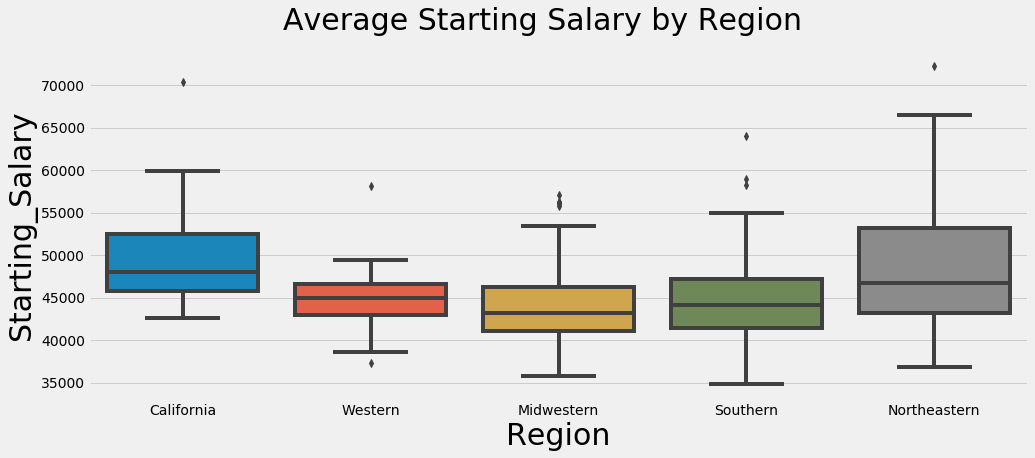

<Figure size 432x288 with 0 Axes>

In [108]:
#Create boxplot to dislay the salary range by region.
plt.figure(figsize=(15,6))
plt.ylabel('Salary', fontsize=30)
plt.xlabel('Region', fontsize=30)
sns.boxplot(x='Region', y='Starting_Salary', data=Region_Clean)
plt.suptitle("Average Starting Salary by Region", fontsize=30)
plt.show()

# Save the figure
plt.savefig("StartingSalMeanByRegion.png")

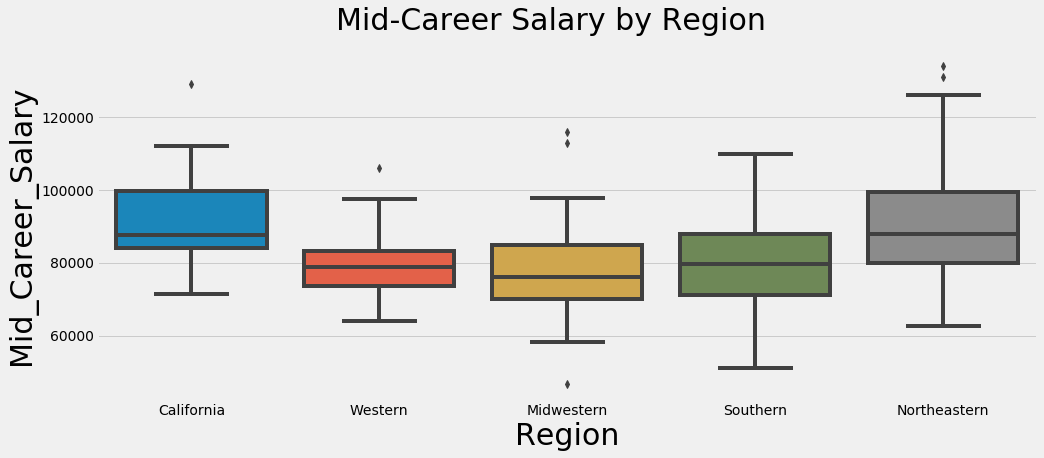

In [109]:
#Create boxplot to dislay the salary range by region.
plt.figure(figsize=(15,6))
plt.ylabel('Salary', fontsize=30)
plt.xlabel('Region', fontsize=30)
sns.boxplot(x='Region', y='Mid_Career_Salary', data=Region_Clean)
plt.suptitle("Mid-Career Salary by Region", fontsize=30)
plt.show

# Save the figure
plt.savefig("MidCareerSalaryByRegion.png")

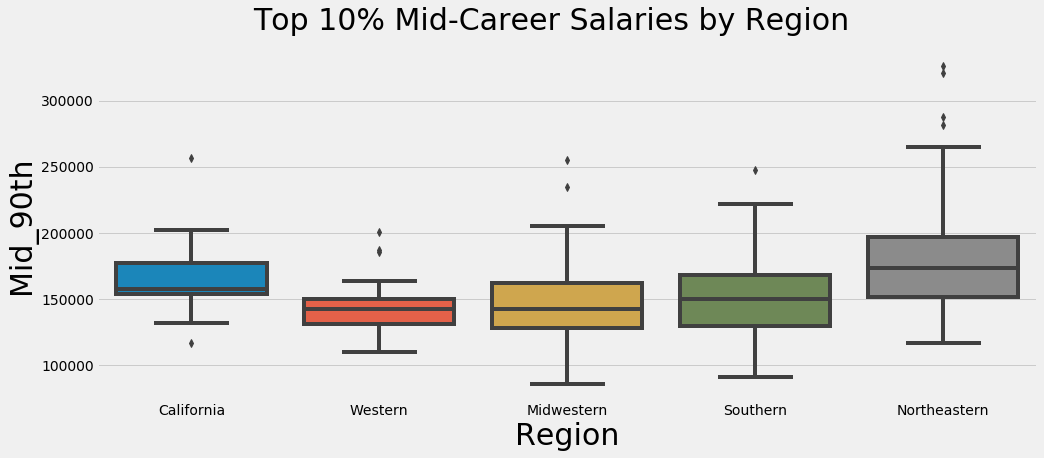

In [110]:
#Create boxplot to dislay the salary range by region.
plt.figure(figsize=(15,6))
plt.ylabel('Salary', fontsize=30)
plt.xlabel('Region', fontsize=30)
sns.boxplot(x='Region', y='Mid_90th', data=Region_Clean)
plt.suptitle("Top 10% Mid-Career Salaries by Region", fontsize=30)
plt.show

# Save the figure
plt.savefig("Mid90thSalaryByRegion.png")

In [111]:
#Extract data by Region from the Master DF
Cali_Region = Region_Clean.loc[Region_Clean["Region"] == "California", :]
Cali_Region.head()

#List salary change over the lenght of mid-career by region; from school with hightest Starting_Mid to lowest Mid_90th
Cali_Sort = Cali_Region.sort_values(['Starting_Salary', 'School Name'], ascending=[False, True])
Cali_Sort.head()

,School Name,Region,Starting_Salary,Mid_Career_Salary,Mid_90th
0,Stanford University,California,70400.0,129000.0,257000.0
3,"University of California, Berkeley",California,59900.0,112000.0,201000.0
5,Cal Poly San Luis Obispo,California,57200.0,101000.0,178000.0
9,University of Southern California (USC),California,54800.0,99600.0,201000.0
12,San Jose State University (SJSU),California,53500.0,95600.0,156000.0


In [112]:
#Extract data by Region from the Master DF
Western_Region = Region_Clean.loc[Region_Clean["Region"] == "Western", :]
Western_Region.head()

#List salary change over the lenght of mid-career by region; from school with hightest Starting_Mid to lowest Mid_90th
Western_Sort = Western_Region.sort_values(['Starting_Salary', 'School Name'], ascending=[False, True])
Western_Sort.head()

,School Name,Region,Starting_Salary,Mid_Career_Salary,Mid_90th
28,Colorado School of Mines,Western,58100.0,106000.0,201000.0
31,Brigham Young University (BYU),Western,49400.0,88600.0,164000.0
33,University of Washington (UW),Western,48800.0,85300.0,149000.0
56,Regis University,Western,48300.0,73800.0,117000.0
40,Seattle University,Western,48300.0,82800.0,150000.0


In [113]:
#Extract data by Region from the Master DF
Northeastern_Region = Region_Clean.loc[Region_Clean["Region"] == "Northeastern", :]
Northeastern_Region.head()

#List salary change over the lenght of mid-career by region; from school with hightest Starting_Mid to lowest Mid_90th
Northeastern_Sort = Northeastern_Region.sort_values(['Starting_Salary', 'School Name'], ascending=[False, True])
Northeastern_Sort.head()

,School Name,Region,Starting_Salary,Mid_Career_Salary,Mid_90th
222,Massachusetts Institute of Technology (MIT),Northeastern,72200.0,126000.0,220000.0
221,Princeton University,Northeastern,66500.0,131000.0,261000.0
224,Harvard University,Northeastern,63400.0,124000.0,288000.0
226,"Polytechnic University of New York, Brooklyn",Northeastern,62400.0,114000.0,190000.0
229,Carnegie Mellon University (CMU),Northeastern,61800.0,111000.0,209000.0


In [114]:
#Extract data by Region from the Master DF
Midwestern_Region = Region_Clean.loc[Region_Clean["Region"] == "Midwestern", :]
Midwestern_Region.head()

#List salary change over the lenght of mid-career by region; from school with hightest Starting_Mid to lowest Mid_90th
Midwestern_Sort = Midwestern_Region.sort_values(['Starting_Salary', 'School Name'], ascending=[False, True])
Midwestern_Sort.head()

,School Name,Region,Starting_Salary,Mid_Career_Salary,Mid_90th
77,University of Missouri - Rolla (UMR),Midwestern,57100.0,95800.0,166000.0
70,University of Notre Dame,Midwestern,56300.0,116000.0,235000.0
74,Case Western Reserve University,Midwestern,56200.0,96500.0,168000.0
73,Illinois Institute of Technology (IIT),Midwestern,56000.0,97800.0,165000.0
78,South Dakota School of Mines & Technology,Midwestern,55800.0,93400.0,147000.0


In [115]:
#Extract data by Region from the Master DF
Southern_Region = Region_Clean.loc[Region_Clean["Region"] == "Southern", :]
Southern_Region.head()

#List salary change over the lenght of mid-career by region; from school with hightest Starting_Mid to lowest Mid_90th
Southern_Sort = Southern_Region.sort_values(['Starting_Salary', 'School Name'], ascending=[False, True])
Southern_Sort.head()

,School Name,Region,Starting_Salary,Mid_Career_Salary,Mid_90th
141,Rice University,Southern,64000.0,110000.0,216000.0
143,Duke University,Southern,58900.0,106000.0,218000.0
144,Georgia Institute of Technology,Southern,58300.0,106000.0,183000.0
142,Georgetown University,Southern,55000.0,110000.0,248000.0
152,Virginia Polytechnic Institute and State Unive...,Southern,53500.0,95400.0,163000.0


In [116]:
#Sort DF by Regions with the Highest to lowest 'Starting_Mid' Salaries
Region_Sort = Region_Clean.sort_values(['Region', 'Starting_Salary'], ascending=[True, False])
Region_Sort.head()

,School Name,Region,Starting_Salary,Mid_Career_Salary,Mid_90th
0,Stanford University,California,70400.0,129000.0,257000.0
3,"University of California, Berkeley",California,59900.0,112000.0,201000.0
5,Cal Poly San Luis Obispo,California,57200.0,101000.0,178000.0
9,University of Southern California (USC),California,54800.0,99600.0,201000.0
12,San Jose State University (SJSU),California,53500.0,95600.0,156000.0


In [117]:
#Find the mean for each period of Salary change and the higestest earners
Region_df = Region_Sort.groupby('Region', as_index=False)['Starting_Salary','Mid_Career_Salary', 'Mid_90th'].mean()
Region_df

,Region,Starting_Salary,Mid_Career_Salary,Mid_90th
0,California,50072.727273,91718.181818,167909.090909
1,Midwestern,44460.937500,78178.125000,147689.062500
2,Northeastern,48679.268293,90929.268293,181926.829268
3,Southern,44946.478873,80018.309859,152769.014085
4,Western,44932.352941,79541.176471,143823.529412


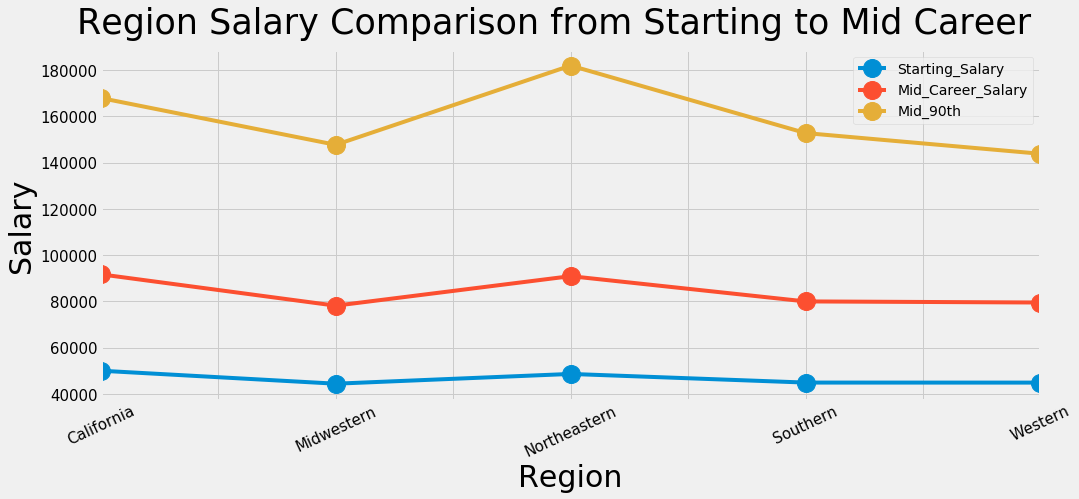

In [118]:
plt.style.use('fivethirtyeight')
df = Region_Clean[['Starting_Salary','Mid_Career_Salary','Mid_90th','Region']]
var = df.groupby('Region').mean()
var.plot(kind='line', marker='o',markersize=18, figsize=(15,6), fontsize=15,)
plt.xticks(rotation=25)
plt.suptitle("Region Salary Comparison from Starting to Mid Career", fontsize=35)
plt.xlabel("Region", fontsize=30)
plt.ylabel("Salary", fontsize=30)

#Save Image
plt.savefig("ComparingRegionSalPercentiles.png")

In [119]:
# Find the number of schools in each Region
School_Count_by_Region = Region_Salary_df['Region'].value_counts()
School_Count_by_Region

Northeastern    100
Southern         79
Midwestern       71
Western          42
California       28
Name: Region, dtype: int64

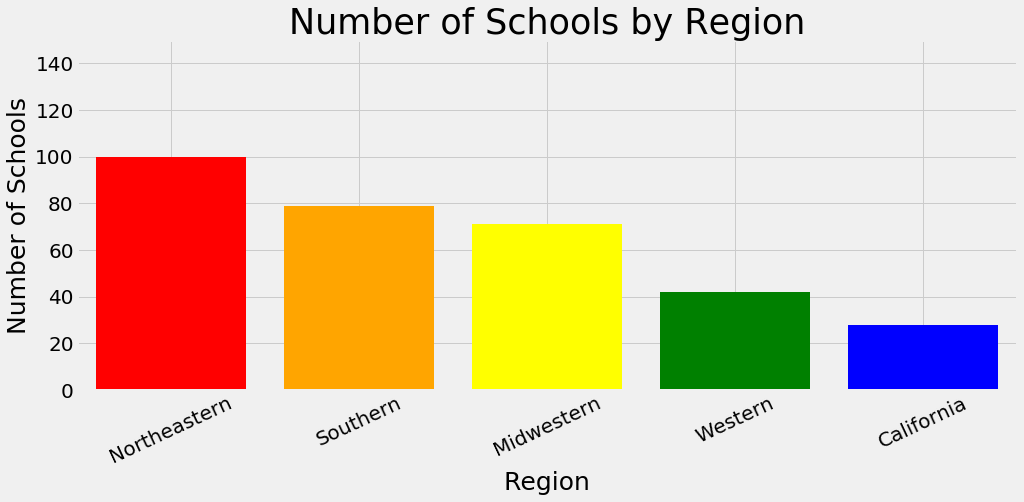

<Figure size 432x288 with 0 Axes>

In [120]:
# Use DataFrame.plot() in order to create a bar chart of the data
x_axis = np.arange(len(School_Count_by_Region))
School_Count_by_Region.plot(kind="bar", fontsize=20, figsize=(15,6))

# Design Graph
plt.title("Number of Schools by Region", fontsize=35)
plt.bar(x_axis, School_Count_by_Region, alpha=1, color=['red','orange','yellow','green','blue'])
plt.xlabel("Region", fontsize=25)
plt.ylabel("Number of Schools", fontsize=25)
plt.xticks(rotation=25)

# Sets the y limits of the current chart
plt.ylim(0, max(School_Count_by_Region)+50)
plt.show()
plt.savefig("NumberOfSchoolsByRegion.png")

In [121]:
#Analysis of Variances (ANOVA) to test the differences between the Starting Salary Means of the Regions
Salary_Mid_Gr3 = Region_Salary_df[Region_Salary_df['Region'] == 'Southern']['Starting_Salary']
Salary_Mid_Gr4 = Region_Salary_df[Region_Salary_df['Region'] == 'Midwestern']['Starting_Salary']
Salary_Mid_Gr5 = Region_Salary_df[Region_Salary_df['Region'] == 'Western']['Starting_Salary']

#Perform Analysis of Variance (ANOVA) test
stats.f_oneway(Salary_Mid_Gr3, Salary_Mid_Gr4, Salary_Mid_Gr5)

F_onewayResult(statistic=0.06391801664620982, pvalue=0.9381021725780996)

In [122]:
#T-TEST used to compare the mean of two samples to evaluate for statistical significant difference
stats.ttest_ind(Cali_Region.Starting_Salary, Northeastern_Region.Starting_Salary, equal_var=False)


Ttest_indResult(statistic=0.8715066369064345, pvalue=0.3889257057233282)

In [123]:
#Analysis of Variances (ANOVA) to test the differences between the Mid-Career Means of the Regions
Mid_Career_Gr3 = Region_Salary_df[Region_Salary_df['Region'] == 'Southern']['Mid_Career_Salary']
Mid_Career_Gr4 = Region_Salary_df[Region_Salary_df['Region'] == 'Midwestern']['Mid_Career_Salary']
Mid_Career_Gr5 = Region_Salary_df[Region_Salary_df['Region'] == 'Western']['Mid_Career_Salary']

#Perform Analysis of Variance (ANOVA) test
stats.f_oneway(Mid_Career_Gr3, Mid_Career_Gr4, Mid_Career_Gr5)

F_onewayResult(statistic=0.24481777854232437, pvalue=0.7830950448608448)

In [124]:
#T-TEST used to compare the mean of two samples to evaluate for statistical significant difference
stats.ttest_ind(Cali_Region.Mid_Career_Salary, Northeastern_Region.Mid_Career_Salary, equal_var=False)


Ttest_indResult(statistic=0.23915015034766166, pvalue=0.8122471781240252)

In [125]:
#Analysis of Variances (ANOVA) to test the differences between the Mid-90th Means of the Highest Earners
Mid_90th_Gr3 = Region_Clean[Region_Clean['Region'] == 'Southern']['Mid_90th']
Mid_90th_Gr4 = Region_Clean[Region_Clean['Region'] == 'Midwestern']['Mid_90th']
Mid_90th_Gr5 = Region_Clean[Region_Clean['Region'] == 'Western']['Mid_90th']

#Perform Analysis of Variance (ANOVA) test
stats.f_oneway(Mid_90th_Gr3, Mid_90th_Gr4, Mid_90th_Gr5)

F_onewayResult(statistic=1.2004125895651334, pvalue=0.30366968678887174)

In [126]:
#T-TEST used to compare the mean of two samples to evaluate for statistical significant difference
stats.ttest_ind(Cali_Region.Mid_90th, Northeastern_Region.Mid_90th, equal_var=False)


Ttest_indResult(statistic=-1.770473254787259, pvalue=0.08323605081644551)